<a href="https://colab.research.google.com/github/2653319/2021IMDB/blob/main/imbd2021_au01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021全國智慧製造大數據分析競賽-初賽

##Datasets:
trining data (train20210817v2.csv): https://drive.google.com/file/d/1ScvMFjEBuu0Qfl7TJQoaZ3JpkD-w42vj/view?usp=sharing

test data (2021test0831.csv): https://drive.google.com/file/d/1gQ3mcurQf9kqnOHWou0I6YubRol3lnXx/view?usp=sharing

In [ ]:
!gdown https://drive.google.com/uc?id=1ScvMFjEBuu0Qfl7TJQoaZ3JpkD-w42vj

Downloading...
From: https://drive.google.com/uc?id=1ScvMFjEBuu0Qfl7TJQoaZ3JpkD-w42vj
To: /content/train20210817v2.csv
7.35MB [00:00, 64.1MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=1gQ3mcurQf9kqnOHWou0I6YubRol3lnXx

Downloading...
From: https://drive.google.com/uc?id=1gQ3mcurQf9kqnOHWou0I6YubRol3lnXx
To: /content/2021test0831.csv
100% 492k/492k [00:00<00:00, 71.3MB/s]


## Models: DNN/RNN IPO models
Input(1)-> DNN->output(1) input(2) ->RNN-> output(2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read training data
df_train = pd.read_csv('train20210817v2.csv')
df_train.shape

(98072, 15)

### Input(1)

In [ ]:
df_input1 = pd.DataFrame()

In [ ]:
df_input1['r1']=df_train['F_1']/24000
df_input1['r2']=df_train['F_2']/31
df_input1['r3']=df_train['F_3']/31
df_input1['r4']=df_train['F_4']/31
df_input1['r5']=df_train['F_5']/31
df_input1['r6']=df_train['F_6']/31
df_input1['r7']=df_train['F_7']/31
df_input1['r8']=df_train['F_8']/31
df_input1['r9']=df_train['F_9']/31
df_input1['r10']=df_train['F_10']/31
df_input1['r11']=df_train['F_11']/31
df_input1['r12']=df_train['F_12']/31
df_input1['r13']=df_train['F_13']/31

In [ ]:
df_output1=pd.DataFrame(df_train['O']/85)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [ ]:
# create and fit a Baseline Neural Network Model
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim=13))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(units=10, activation='relu'))
model1.add(Dense(1))

In [ ]:
model1.compile(loss='mse', optimizer='adam')

In [ ]:
X=df_input1.to_numpy()

In [ ]:
y=df_output1.to_numpy()

In [ ]:
model1.fit(X, y, epochs=30, batch_size=1024, verbose=1)

In [ ]:
yhat = model1.predict(X)

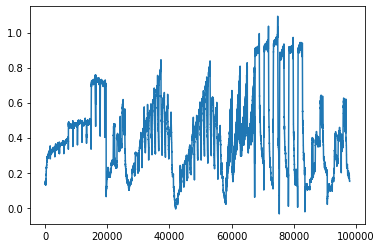

In [ ]:
plt.plot(yhat)
plt.show()

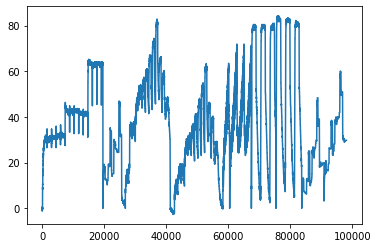

In [ ]:
plt.plot(df_train["O"])
plt.show()

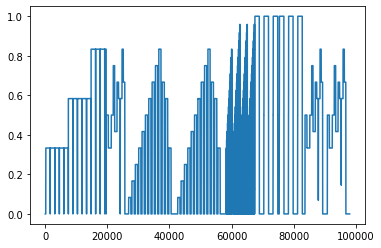

In [ ]:
plt.plot(df_input1['r1'])
plt.show()

In [ ]:
dataset=y.reshape(-1, 1)

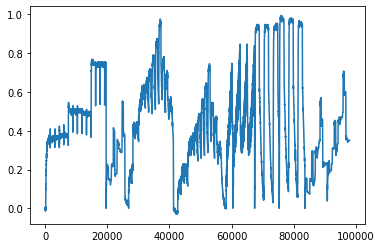

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
dataset.shape

(98072, 1)

In [ ]:
dataset[0:3]

array([ 0. , -0.6,  0.6])

In [ ]:
def create_dataset(dataset1, dataset2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset1)-look_back-1):
		a = dataset1[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

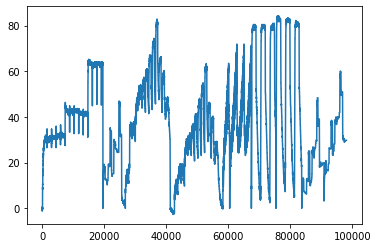

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
dataset1 = yhat
dataset2 = y

In [ ]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
allX, allY = create_dataset(dataset1, dataset2, look_back)

In [ ]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))

In [ ]:
allX.shape

(97831, 1, 240)

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model2 = Sequential()
model2.add(LSTM(25, input_shape=(1, look_back)))
model2.add(Dropout(0.1))
model2.add(Dense(1))
model2.compile(loss='mse', optimizer='adam')

In [ ]:
model2.fit(allX, allY, epochs=20, batch_size=240, verbose=1)

In [ ]:
allPredict= model2.predict(allX)

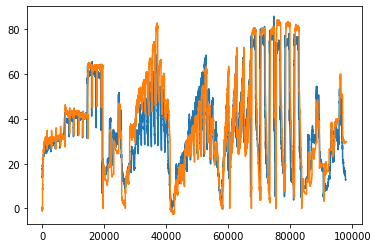

In [ ]:
allY = allPredict*85
plt.plot(allY)
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(df_train['O'])
plt.show()

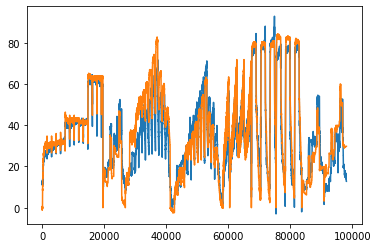

In [ ]:
plt.plot(yhat*85)
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(df_train['O'])
plt.show()

## Test data

In [ ]:
#Read training data
df_test = pd.read_csv('2021test0831.csv')
df_test.shape

(7222, 14)

In [ ]:
df_input1 = pd.DataFrame()

In [ ]:
df_input1['r1']=df_test['F_1']/24000
df_input1['r2']=df_test['F_2']/31
df_input1['r3']=df_test['F_3']/31
df_input1['r4']=df_test['F_4']/31
df_input1['r5']=df_test['F_5']/31
df_input1['r6']=df_test['F_6']/31
df_input1['r7']=df_test['F_7']/31
df_input1['r8']=df_test['F_8']/31
df_input1['r9']=df_test['F_9']/31
df_input1['r10']=df_test['F_10']/31
df_input1['r11']=df_test['F_11']/31
df_input1['r12']=df_test['F_12']/31
df_input1['r13']=df_test['F_13']/31

In [ ]:
X=df_input1.to_numpy()

In [ ]:
yhat = model1.predict(X)

In [ ]:
yhat.shape

(7222, 1)

In [ ]:
allX, allY = create_dataset(yhat, yhat, look_back)

In [ ]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))

In [ ]:
allPredict= model2.predict(allX)

In [ ]:
allPredict.shape

(6981, 1)

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(yhat)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(yhat)-1, :] = allPredict

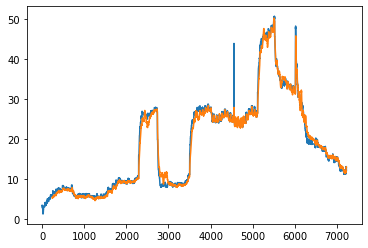

In [ ]:
plt.plot(yhat*85)
# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot*85)
plt.show()

In [ ]:
result = yhat

In [ ]:
result[look_back:len(yhat)-1, :] = allPredict

In [ ]:
result = result*85

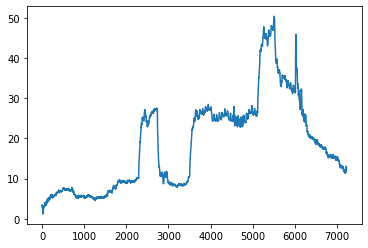

In [ ]:
plt.plot(result)
plt.show()